<h1>Data Preparation</h1>

<h3>1. Discovering missing values</h3>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [6]:
data = pd.read_csv("../data/aud_data/aud3/spaceship_titanic.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8292 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         1892 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           7699 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
data.isnull().sum()

PassengerId        0
HomePlanet       401
CryoSleep        217
Cabin           6801
Destination      182
Age              994
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
dtype: int64

In [8]:
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})

missing_percent

,column,percent missing
0,PassengerId,0.000000
1,HomePlanet,4.612907
2,CryoSleep,2.496261
3,Cabin,78.235362
4,Destination,2.093639
5,Age,11.434488
6,VIP,2.335212
7,RoomService,2.082135
8,FoodCourt,2.105142
9,ShoppingMall,2.392730


<h4>Missing Value Bar Chart</h4>

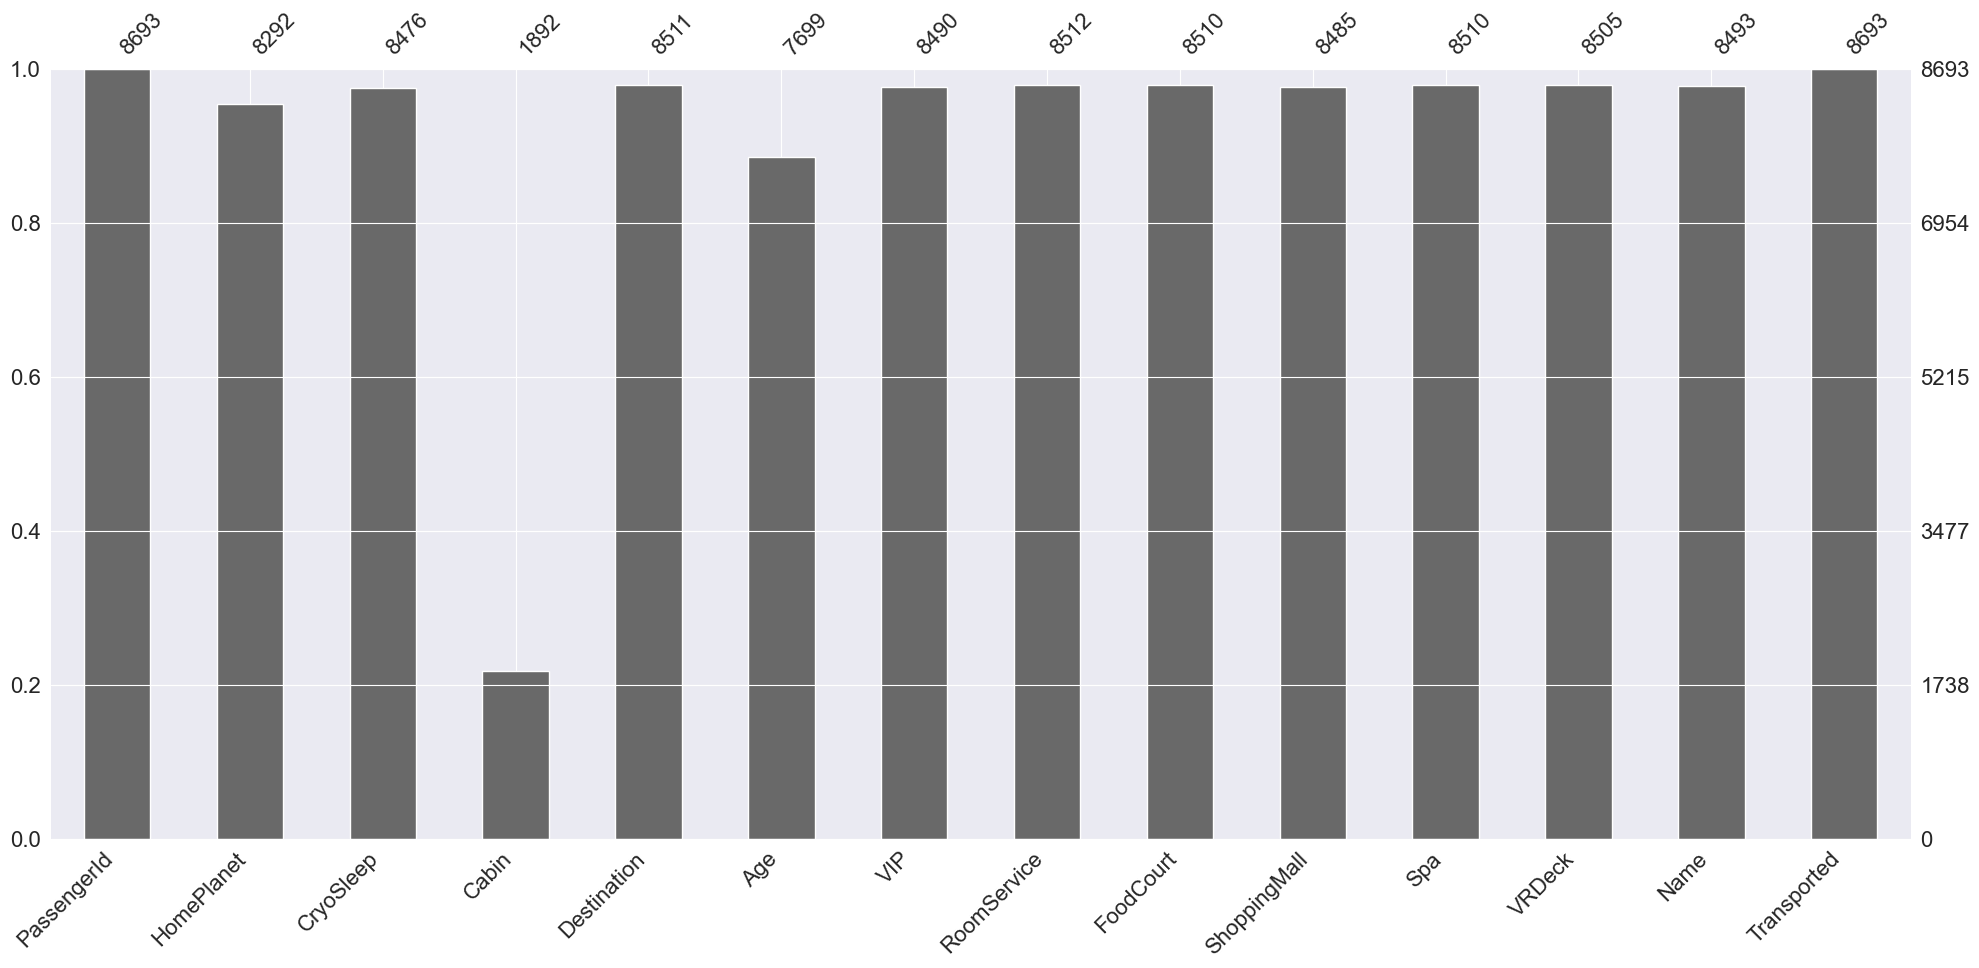

In [9]:
msno.bar(data)
plt.show()

<h4>Missing Value Matrix Chart</h4>

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

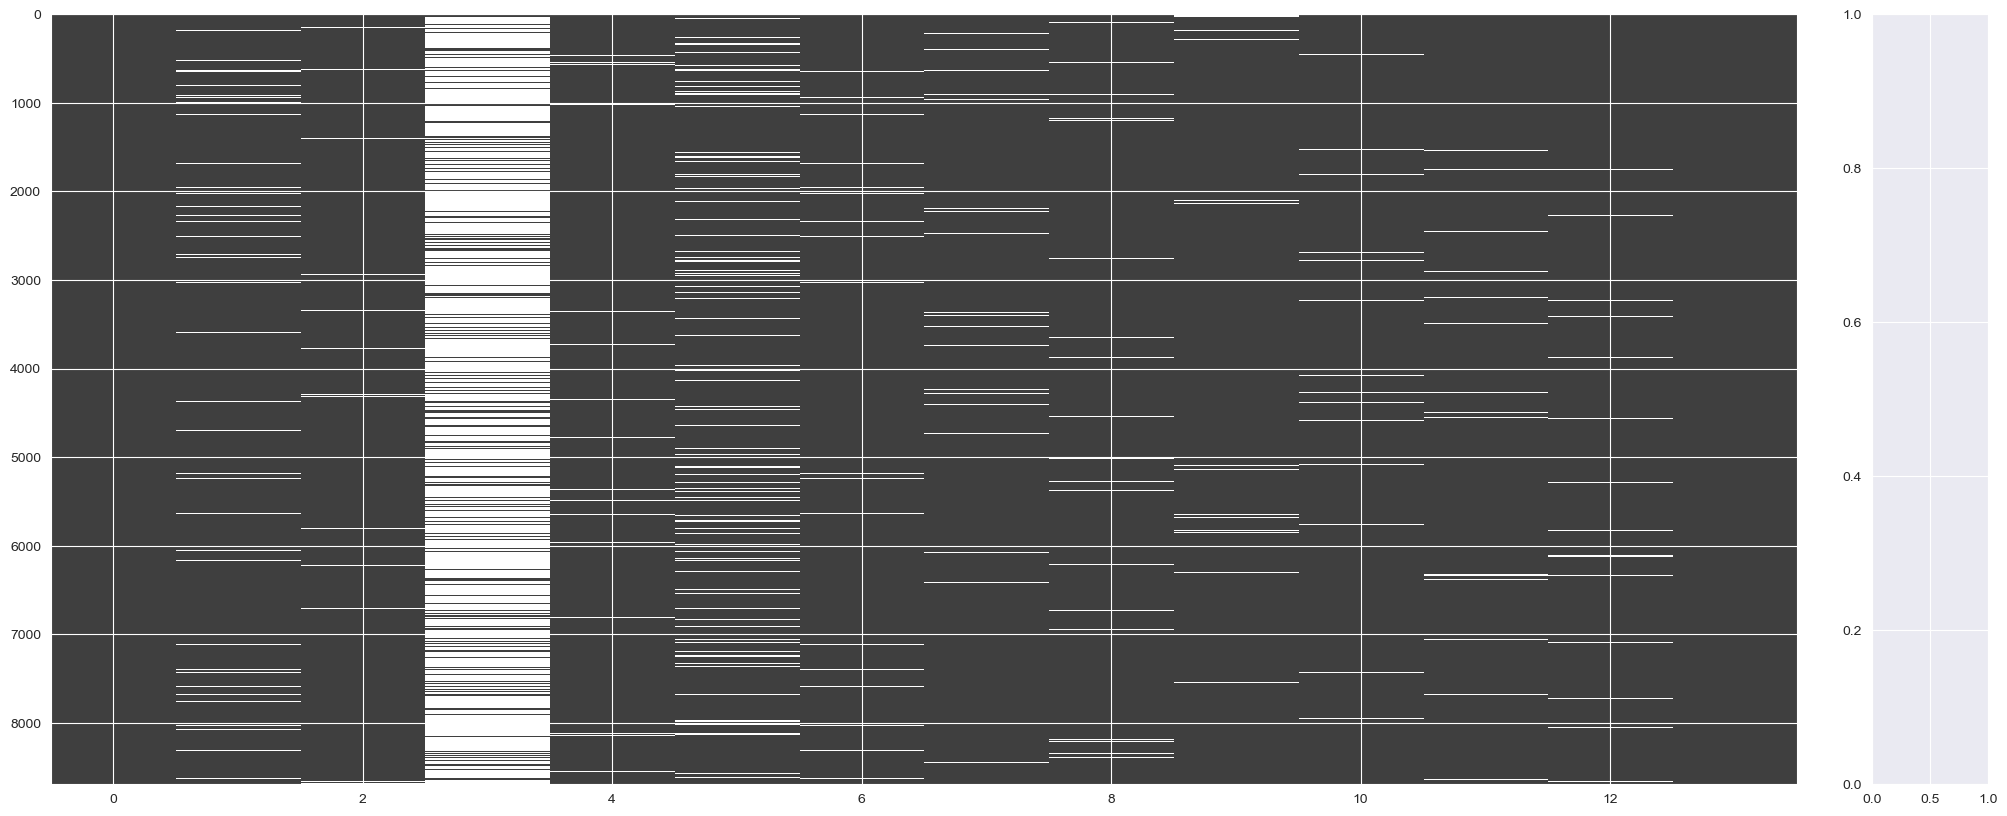

In [10]:
msno.matrix(data)
plt.show()

In [ ]:
msno.matrix(data.sort_values('VIP'))
plt.show()

<h4>Missing Value Correlations - Heatmap</h4>

In [ ]:
msno.heatmap(data) #korelacii pomegju missing values
plt.show()

<h4>Dendogram</h4>

In [ ]:
msno.dendrogram(data) #korelacii pak
plt.show()

<h3>3. Handling missing values</h3>


<b style="color:red">Parwise Deletion</b> is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean,sum etc intrinsically skip missing values. <br>
<b style="color:red">Listwise deletion</b>, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values.<h4>Brisenje kolona & redica</h4>



In [48]:
data = data.dropna(subset=['RoomService'], axis=0)
#This line removes all rows that have missing (NaN) values in the 'RoomService' column. 
print(data["RoomService"].isnull().sum())

0


In [49]:
data = data.drop(columns='Cabin') #dropping a column

KeyError: "['Cabin'] not found in axis"

<h4>Data Imputation</h4>

<h4> Menuvanje so najcesto</h4>

In [51]:
frequent_imputer = SimpleImputer(strategy = 'most_frequent')
data['HomePlanet'] = data['HomePlanet'].astype(str)  # Simple imputer with most_frequent works with numbers (integers) and strings
data['HomePlanet'] = frequent_imputer.fit_transform([data['HomePlanet']])[0]  # should fill missing values with 'Earth' since it's the most frequent
data.isnull().sum()


PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt       181
ShoppingMall      0
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

<h4>Menuvanje so prosek</h4>

In [52]:
data.Age = data.Age.fillna(data.Age.mean())
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt       181
ShoppingMall      0
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

<h4>Menuvanje so medijana</h4>

In [53]:
data.ShoppingMall = data.ShoppingMall.fillna(data.ShoppingMall.median())
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt       181
ShoppingMall      0
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

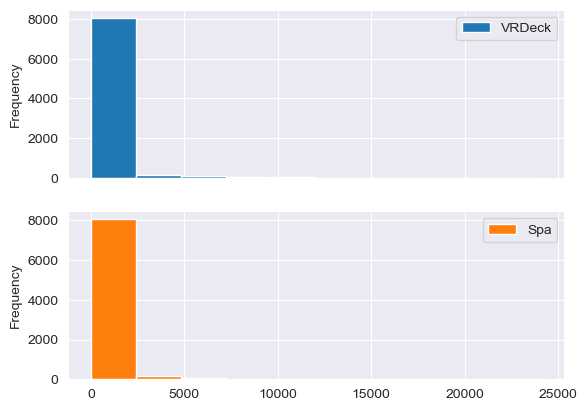

In [54]:
data[['VRDeck', 'Spa']].plot.hist(subplots=True)
plt.show()

<h4>Menuvanje so KNN</h4>


In [58]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['VRDeck', 'Spa']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data = scaler.inverse_transform(imputed_data)
data[['VRDeck', 'Spa']] = imputed_data
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt       181
ShoppingMall      0
Spa               0
VRDeck            0
Name            199
Transported       0
dtype: int64

<h4>Menuvanje so MICE</h4>

In [2]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [65]:
mice = IterativeImputer()
imputed_values = mice.fit_transform(data[['VRDeck', 'FoodCourt', 'Spa']])
data[['VRDeck', 'FoodCourt', 'Spa']] = imputed_values
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            199
Transported       0
dtype: int64

<h3>3. Time - Series Missing Value Imputation</h3>

In [8]:
aq_data = pd.read_csv('../data/aud_data/aud3/air_quality_missing.csv')
aq_data.head(20)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,1/1/2017 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,73.0,57.0
1,1/1/2017 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,71.0,59.0
2,1/1/2017 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,70.0,59.0
3,1/1/2017 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,NaN,58.0
4,1/1/2017 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,NaN,0.002,1.2,NaN,61.0
5,1/1/2017 5:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,NaN,0.002,1.1,NaN,61.0
6,1/1/2017 6:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.049,0.002,1.1,NaN,57.0
7,1/1/2017 7:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.045,0.002,1.0,NaN,60.0
8,1/1/2017 8:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.047,0.002,1.1,NaN,60.0
9,1/1/2017 9:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.047,0.002,1.1,NaN,63.0


In [7]:
aq_data.isnull().sum()

Measurement date      0
Station code          0
Address               0
Latitude              0
Longitude             0
SO2                  74
NO2                  90
O3                   75
CO                  114
PM10                 95
PM2.5                78
dtype: int64

In [9]:
aq_data.tail(20)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
647491,12/31/2019 4:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.010,0.023,0.4,42.0,34.0
647492,12/31/2019 5:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.011,0.023,0.4,31.0,24.0
647493,12/31/2019 6:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.021,0.4,28.0,22.0
647494,12/31/2019 7:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.018,0.019,0.4,25.0,19.0
647495,12/31/2019 8:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.019,0.019,0.4,25.0,17.0
647496,12/31/2019 9:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.017,0.020,0.4,20.0,13.0
647497,12/31/2019 10:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.014,0.023,0.4,20.0,11.0
647498,12/31/2019 11:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.014,0.023,0.4,18.0,13.0
647499,12/31/2019 12:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.023,0.4,19.0,14.0
647500,12/31/2019 13:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.023,0.4,22.0,15.0


In [10]:
aq_data['NO2'] = aq_data['NO2'].bfill()
aq_data['CO'] = aq_data['CO'].ffill()

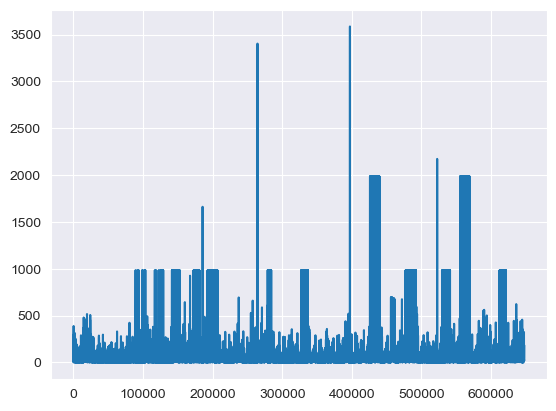

In [14]:
plt.plot(aq_data['PM10'])

In [15]:
aq_data['PM10'] = aq_data['PM10'].interpolate(limit_direction='both')


In [17]:
aq_data.isnull().sum()

Measurement date     0
Station code         0
Address              0
Latitude             0
Longitude            0
SO2                 74
NO2                  0
O3                  75
CO                   0
PM10                 0
PM2.5               78
dtype: int64

<h4>Label Encoding</h4>

In [25]:
data["HomePlanet"]

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8693, dtype: object

In [27]:
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(data['HomePlanet'])
data['HomePlanet_Enc'] = encoded_values
data[["HomePlanet","HomePlanet_Enc"]]

,HomePlanet,HomePlanet_Enc
0,Europa,1
1,Earth,0
2,Europa,1
3,Europa,1
4,Earth,0
...,...,...
8688,Europa,1
8689,Earth,0
8690,Earth,0
8691,Europa,1


In [39]:
data.groupby("Destination").size()

Destination
55 Cancri e      1800
PSO J318.5-22     796
TRAPPIST-1e      5915
dtype: int64

In [11]:
one_hot_destination = pd.get_dummies(data.Destination)
data = pd.concat([data, one_hot_destination], axis=1)
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0001_01,Europa,False,NaN,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,False,True
1,0002_01,Earth,False,NaN,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,False,False,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,False,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,False,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,NaN,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,True,False,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,False,True,False
8690,9279_01,Earth,False,NaN,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,False,False,True
8691,9280_01,Europa,False,NaN,55 Cancri e,NaN,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,True,False,False
